# FERMI DATA: Flow-Matching

In [2]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from DynGenModels.models.mlp import MLP
from DynGenModels.configs.fermi_configs import Fermi_FlowMatch_MLP_Configs as Configs

#...define hyperparameters:

configs = Configs(dataset = '../data/fermi/fermi_data_galactic_coord.npy',
                features = ['theta', 'phi', 'energy'],
                preprocess = ['normalize', 'logit_transform', 'standardize'],
                cuts = {'theta': [-20., 20.], 'phi': [4., 10.], 'energy': [1000, 2000]},
                sigma = 0.0,
                data_split_fracs = [0.6, 0.1, 0.3],
                epochs = 10,
                early_stopping=100,
                batch_size = 512,
                warmup_epochs = 100,
                lr = 1e-3,
                dim_hidden = 512, 
                device = 'cpu',
                solver='euler',
                num_sampling_steps=50,
                seed = 12345
                )

#...run experiment:

from DynGenModels.datamodules.fermi.datasets import FermiDataset
from DynGenModels.datamodules.fermi.dataprocess import PostProcessFermiData
from DynGenModels.datamodules.fermi.dataloader import FermiDataLoader
from DynGenModels.dynamics.flowmatch import SimplifiedCondFlowMatching
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline
from DynGenModels.pipelines.utils import RunFlowPipeline

fermi = RunFlowPipeline(workdir='../results',
                        dataset=FermiDataset,
                        dataloader=FermiDataLoader,
                        net=MLP,
                        configs=configs,
                        dynamics=SimplifiedCondFlowMatching,
                        pipeline=FlowMatchPipeline,
                        postprocessor=PostProcessFermiData
                        )  

#=================================================================================================
INFO: created directory: ../results/Fermi_FlowMatch_MLP.fermi_galactic_center_2023.09.27_16h32__1
#=================================================================================================
+--------------------+-------------------------------------------------+
| Key                | Value                                           |
+--------------------+-------------------------------------------------+
| dataset            | ../data/fermi/fermi_data_galactic_coord.npy     |
| data_name          | fermi_galactic_center                           |
| features           | ['theta', 'phi', 'energy']                      |
| preprocess         | ['normalize', 'logit_transform', 'standardize'] |
| cuts               | theta: [-20.0, 20.0]                            |
|                    | phi: [4.0, 10.0]                                |
|                    | energy: [1000, 2000]    

epochs:   0%|          | 0/10 [00:00<?, ?it/s]

	 test loss: 0.0031590362025958134  (min loss: 0.0031590362025958134)


sampling:   0%|          | 0/114 [00:00<?, ?it/s]

/Users/dario/anaconda3/lib/python3.10/site-packages/torchdyn/numerics/odeint.py:84: UserWarning: Setting tolerances has no effect on fixed-step methods
  warn("Setting tolerances has no effect on fixed-step methods")


INFO: post-processing sampled data with ['inverse_standardize', 'inverse_logit_transform', 'inverse_normalize']


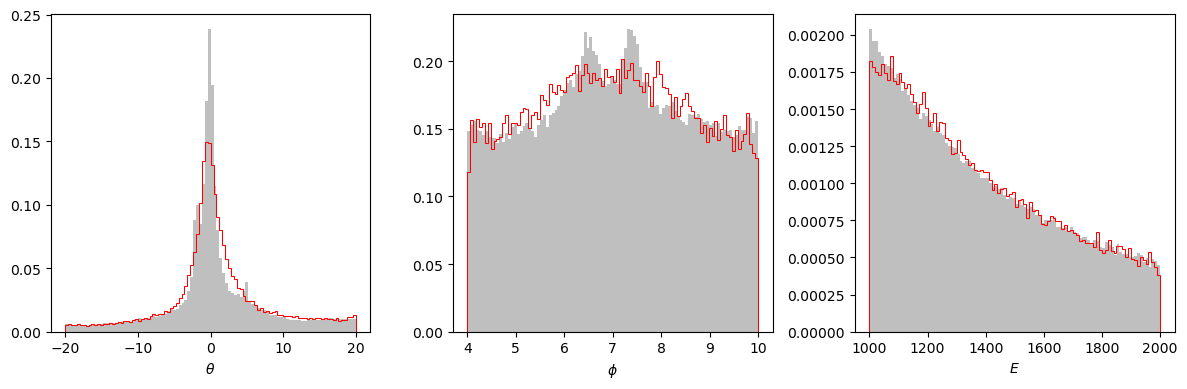

In [3]:


# bin_steps = 50
# bins = np.linspace(-1, 1, bin_steps)

bins=100 
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].hist(x=fermi.target[:,0], color='r', bins=bins, histtype='step', lw=0.75, density=True)
ax[0].hist(x=fermi.dataset.target[:,0], color='k', bins=bins, histtype='stepfilled', alpha=0.25, lw=0, density=True)

ax[1].hist(x=fermi.target[:,1], color='r', bins=bins, histtype='step', lw=0.75, density=True)
ax[1].hist(x=fermi.dataset.target[:,1], color='k', bins=bins, histtype='stepfilled', alpha=0.25, lw=0, density=True)

ax[2].hist(x=fermi.target[:,2], color='r', bins=bins, histtype='step', lw=0.75, density=True)
ax[2].hist(x=fermi.dataset.target[:,2], color='k', bins=bins, histtype='stepfilled', alpha=0.25, lw=0,density=True)

ax[0].set_xlabel(r'$\theta$')
ax[1].set_xlabel(r'$\phi$')
ax[2].set_xlabel(r'$E$')
plt.tight_layout()
plt.show()


# FERMI DATA: Normalizing flows

In [2]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#...define hyperparameters:

from DynGenModels.models.maf import MAFAffine
from DynGenModels.configs.fermi_configs import Fermi_NormFlow_MAF_Affine_Configs as Configs

configs = Configs(dataset = '../data/fermi/fermi_data_galactic_coord.npy',
                features = ['theta', 'phi', 'energy'],
                preprocess = ['normalize', 'logit_transform', 'standardize'],
                cuts = {'theta': [-20., 20.], 'phi': [4., 10.], 'energy': [1000, 2000]},
                data_split_fracs = [0.6, 0.1, 0.3],
                epochs = 50,
                early_stopping=20,
                batch_size = 512,
                warmup_epochs = 20,
                lr = 1e-3,
                dim_hidden = 128, 
                device = 'cpu',
                seed = 12345,
                num_transforms = 5,
                num_gen_samples = 58000
                )

configs.set_workdir(path='../results', save_config=True)

#=======================================================================================================
INFO: created directory: ../results/Fermi_NormFlow_MAF_Affine.fermi_galactic_center_2023.09.28_00h35__1
#=======================================================================================================
+---------------------+-------------------------------------------------+
| Key                 | Value                                           |
+---------------------+-------------------------------------------------+
| dataset             | ../data/fermi/fermi_data_galactic_coord.npy     |
| data_name           | fermi_galactic_center                           |
| features            | ['theta', 'phi', 'energy']                      |
| preprocess          | ['normalize', 'logit_transform', 'standardize'] |
| cuts                | theta: [-20.0, 20.0]                            |
|                     | phi: [4.0, 10.0]                                |
|                   

### Load data and build dataloader

In [5]:
from DynGenModels.datamodules.fermi.datasets import FermiDataset
from DynGenModels.datamodules.fermi.dataprocess import PostProcessFermiData
from DynGenModels.datamodules.fermi.dataloader import FermiDataLoader

dataset = FermiDataset(configs)
dataloader = FermiDataLoader(dataset, configs)

INFO: loading and preprocessing data...
	- target dataset: ../data/fermi/fermi_data_galactic_coord.npy 
 	- target shape: torch.Size([193811, 3])
	- source dataset: std gaussian 
 	- source shape: torch.Size([193811, 3])
INFO: building dataloaders...
INFO: train/val/test split ratios: 0.6/0.1/0.3
INFO: train size: 116286, validation size: 19381, testing sizes: 58144


### Train normalzing flow

In [6]:
from DynGenModels.dynamics.normflows import NormalizingFlow
from DynGenModels.trainer.trainer import DynGenModelTrainer

maf = MAFAffine(configs)
nflow = DynGenModelTrainer(dynamics=NormalizingFlow(maf, configs), 
                           dataloader=dataloader,
                           configs=configs)

nflow.train()


INFO: number of training parameters: 34310


epochs:   0%|          | 0/50 [00:00<?, ?it/s]

	 test loss: 0.008142385841504653  (min loss: 0.008142385841504653)
	 test loss: 0.007869438677034378  (min loss: 0.007869438677034378)
	 test loss: 0.00785556394835755  (min loss: 0.007845310485557987)
	 test loss: 0.007833495412434558  (min loss: 0.007829029870952199)
	 test loss: 0.007819327264432168  (min loss: 0.007819327264432168)


### Sample new data

In [7]:
from DynGenModels.pipelines.SamplingPipeline import NormFlowPipeline
from DynGenModels.datamodules.fermi.dataprocess import PostProcessFermiData

pipeline = NormFlowPipeline(trained_model=nflow, configs=configs, postprocessor=PostProcessFermiData)

INFO: post-processing sampled data with ['inverse_standardize', 'inverse_logit_transform', 'inverse_normalize']


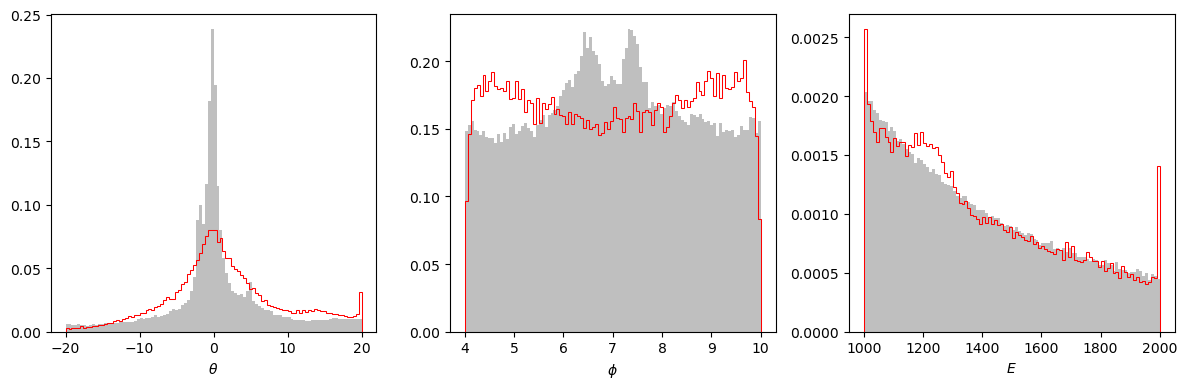

In [8]:
bins=100 
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].hist(x=pipeline.target[:,0], color='r', bins=bins, histtype='step', lw=0.75, density=True)
ax[0].hist(x=dataset.target[:,0], color='k', bins=bins, histtype='stepfilled', alpha=0.25, lw=0, density=True)

ax[1].hist(x=pipeline.target[:,1], color='r', bins=bins, histtype='step', lw=0.75, density=True)
ax[1].hist(x=dataset.target[:,1], color='k', bins=bins, histtype='stepfilled', alpha=0.25, lw=0, density=True)

ax[2].hist(x=pipeline.target[:,2], color='r', bins=bins, histtype='step', lw=0.75, density=True)
ax[2].hist(x=dataset.target[:,2], color='k', bins=bins, histtype='stepfilled', alpha=0.25, lw=0,density=True)

ax[0].set_xlabel(r'$\theta$')
ax[1].set_xlabel(r'$\phi$')
ax[2].set_xlabel(r'$E$')
plt.tight_layout()
plt.show()
